<a href="https://colab.research.google.com/github/baveet256/Pytorch-DL/blob/main/Face_emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import zipfile
dir_path = Path("/content/drive/MyDrive/Face_Dataset")
unzip_path = dir_path / "unzipped"

if unzip_path.is_dir():
    print("is there")
else:  
  unzip_path.mkdir(parents=True, exist_ok=True)
  with zipfile.ZipFile("/content/drive/MyDrive/ Face_Dataset/archive.zip") as f:
    f.extractall(unzip_path)

In [15]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch import nn

In [16]:
from pathlib import Path
data_path = Path("/content/drive/MyDrive/Face_Dataset/unzipped")

In [28]:
data_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() 
])

In [17]:
train_dir = data_path / "train"
test_dir = data_path / "test"

In [18]:
train_dir

PosixPath('/content/drive/MyDrive/Face_Dataset/unzipped/train')

In [29]:
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 28709
    Root location: /content/drive/MyDrive/Face_Dataset/unzipped/train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 7178
    Root location: /content/drive/MyDrive/Face_Dataset/unzipped/test
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [20]:
class_names = train_data.classes
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [30]:
train_data[0][0].shape

torch.Size([1, 48, 48])

In [31]:
# to visualize we will do matplotlib
import matplotlib.pyplot as plt

torch.Size([48, 48])


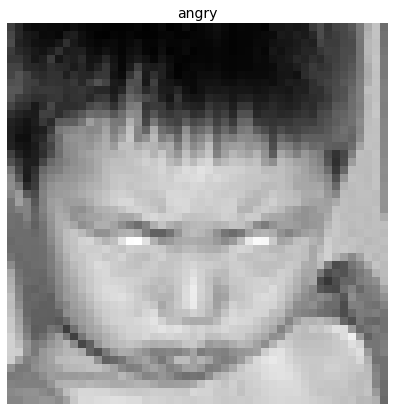

In [38]:
img,label = train_data[0][0],train_data[0][1]
img_new = img.permute(1,2,0).squeeze(dim=2)
print(img_new.shape)
plt.figure(figsize=(10, 7))
plt.imshow(img_new, cmap='gray')
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [ ]:
train_dataloader = DataLoader(dataset=train_data,batch_size=32,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=32,shuffle=True)

In [63]:
class Emotionmodel(nn.Module):
  def __init__(self,input_channels:int,out_channel:int):
    super().__init__()
    self.layer_stack1 = nn.Sequential(
      nn.Conv2d(in_channels=input_channels,out_channels=32, kernel_size = 3, padding =1, stride=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=32,out_channels=64, kernel_size = 3, padding =1, stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Dropout(p=0.25),
    )
    self.layer_stack2 = nn.Sequential(
      nn.Conv2d(in_channels=64,out_channels=128, kernel_size = 3, padding =1, stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Conv2d(in_channels=128,out_channels=128, kernel_size = 3, padding =1, stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2),
      nn.Dropout(p=0.25),
    )
    self.layer_stack3 = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features = 1024,out_features=256),
      nn.ReLU(),
      nn.Dropout(p=0.5),
      nn.Linear(in_features =256 ,out_features=7),
      nn.Softmax(dim=1)
    )
  def forward(self,x):
    x = self.layer_stack1(x)
    print(x.shape)
    x = x.unsqueeze(dim=0)
    print(x.shape)
    x = self.layer_stack1(x)
    print(x.shape)
    x = self.layer_stack1(x)
    print(x.shape)
    return x

In [64]:
torch.manual_seed(42)
model_conv = Emotionmodel(1,out_channel = len(train_data.classes))
model_conv

Emotionmodel(
  (layer_stack1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
  )
  (layer_stack2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.25, inplace=False)
  )
  (layer_stack3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1024, out_features=256, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=25

In [54]:
img.shape

torch.Size([1, 48, 48])

In [65]:
model_conv(img)

torch.Size([64, 24, 24])
torch.Size([1, 64, 24, 24])


RuntimeError: ignored

In [61]:
trail = torch.tensor([64, 24, 24])
trail.shape

torch.Size([3])

In [62]:
trail.unsqueeze(dim=0).shape

torch.Size([1, 3])